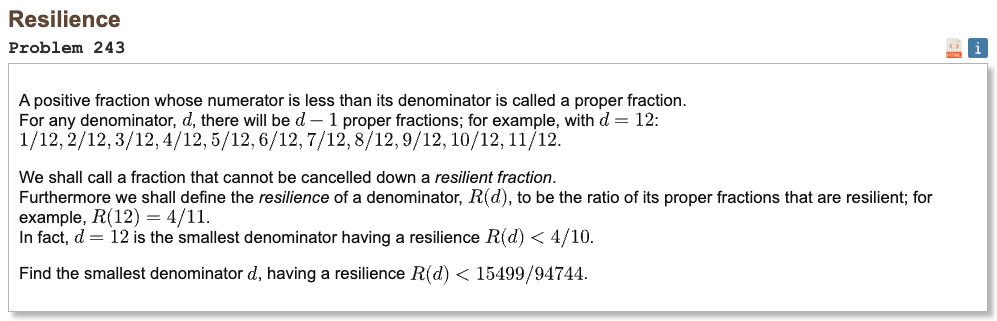

## Initial approach

* resilience is R(d) = φ(d) / (d − 1), so we want the smallest d with φ(d) / (d − 1) < 15499 / 94744
* making d divisible by many small primes shrinks φ(d) relative to d, so the best candidates are built from small primes first
* write d as a product of prime powers, then φ(d) is easy to update while you build d
* search d by trying primes in increasing order and choosing exponents in nonincreasing order, this keeps the search tiny and focused on minimal d values
* at each partial product, check the exact inequality with integer arithmetic (no floats) to see if it already beats the target
* keep the best d found and prune any branch whose current d is already at least that best value

In [1]:
from math import isqrt

def solve():
    num = 15499
    den = 94744

    primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]

    best = 10**30

    def ok(n, phi):
        return phi * den < (n - 1) * num

    def dfs(i, last_exp, n, phi):
        nonlocal best
        if n >= best:
            return
        if n > 1 and ok(n, phi):
            best = n
            return
        if i >= len(primes):
            return

        p = primes[i]
        nn = n
        ph = phi

        for e in range(1, last_exp + 1):
            if nn > best // p:
                break
            nn *= p
            if e == 1:
                ph *= (p - 1)
            else:
                ph *= p
            dfs(i + 1, e, nn, ph)

    dfs(0, 64, 1, 1)
    return best

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 892371480
CPU times: user 2.7 ms, sys: 176 μs, total: 2.88 ms
Wall time: 2.86 ms
